In [1]:
%matplotlib inline
import numpy as np
from PIL import Image
from keras.models import model_from_json
from mask_utils import get_images, get_input_prediction_tiles, image_from_tiles

Using TensorFlow backend.


In [11]:
model_file   = 'data/results/model_171112_nomaxpool.json'
weights_file = 'data/results/mask_weights_171112_105811.h5'

# very interesting comparison.  Nomaxpool is WAY better than maxpool-enabled.
#model_file   = 'data/results/model_171112.json'
#weights_file = 'data/results/mask_weights_171112_123000.h5'

with open(model_file,"r") as f:
    json_string = f.read()
model = model_from_json(json_string)
model.load_weights(weights_file)

In [12]:
#base_name = 'chromatic'
for base_name in ['chromatic','chromatic_piano','gen_one','gen_two','twinkle']:
    print(f"predicting {base_name}")
    score_image, mask_image = get_images(base_name)
    input_tiles = get_input_prediction_tiles(score_image)
    pred_tiles = model.predict(input_tiles)
    pred_one = image_from_tiles(score_image.width, score_image.height, 
                                input_tiles.shape[0], pred_tiles, 1)
    #pred_one
    with open(f"data/results/pred_mask_{base_name}_nomaxpool.png",'wb') as f:
        pred_one.save(f)

predicting chromatic
predicting chromatic_piano
predicting gen_one
predicting gen_two
predicting twinkle


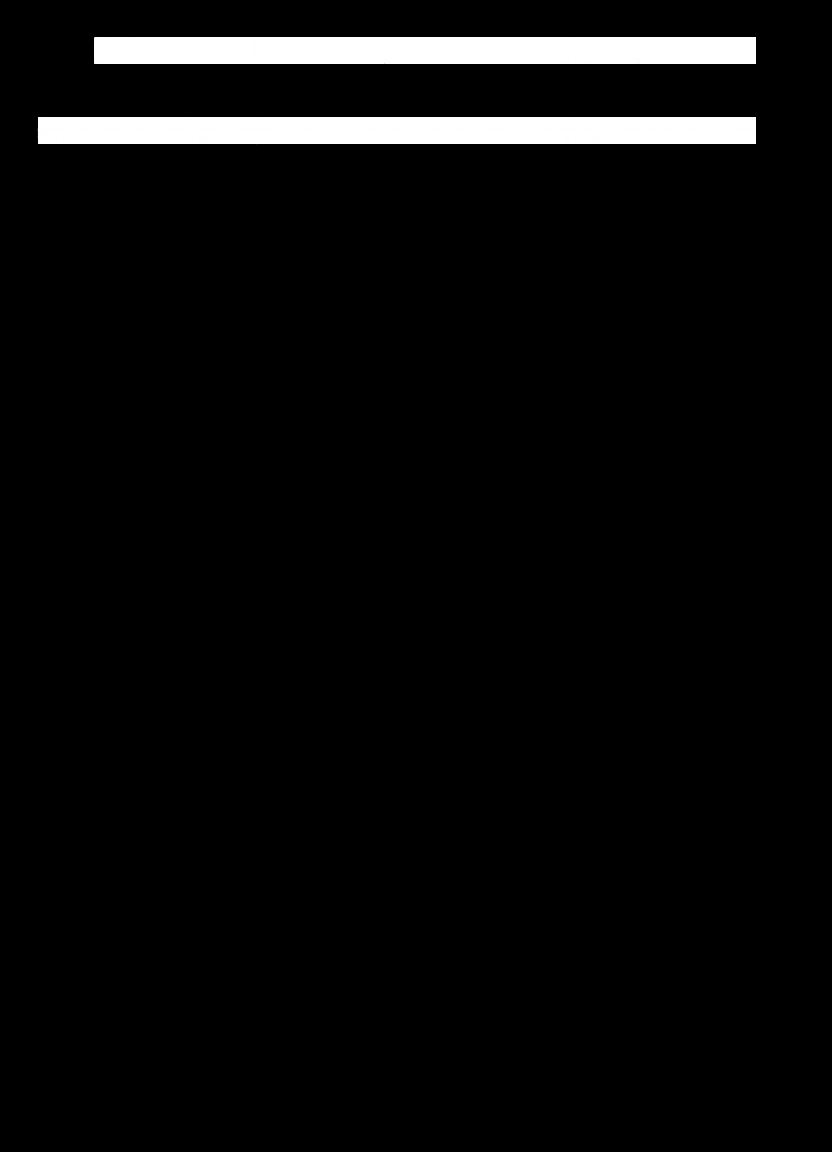

In [13]:
pred_one

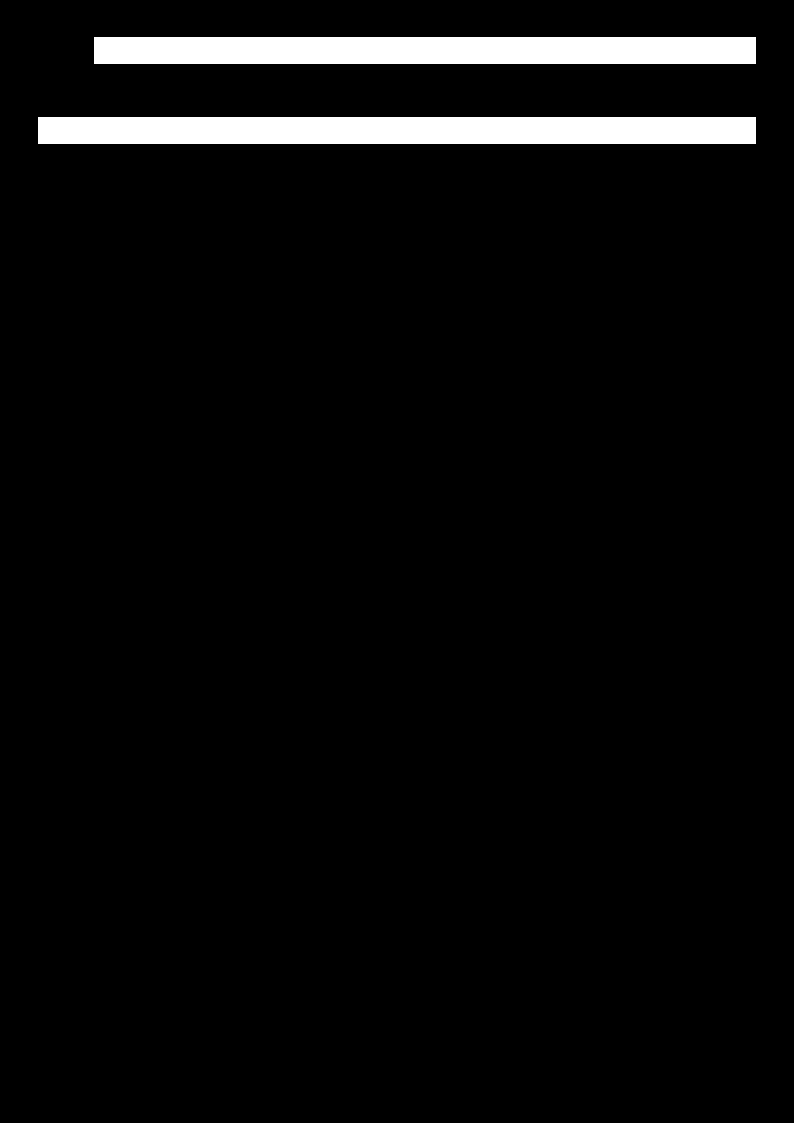

In [7]:
mask_image

In [14]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
image_input (InputLayer)         (None, 64, 64, 1)     0                                            
____________________________________________________________________________________________________
initial_3x3_conv2d (Conv2D)      (None, 64, 64, 24)    240         image_input[0][0]                
____________________________________________________________________________________________________
DB_DN0_0_batchnorm (BatchNormali (None, 64, 64, 24)    96          initial_3x3_conv2d[0][0]         
____________________________________________________________________________________________________
DB_DN0_0_relu (Activation)       (None, 64, 64, 24)    0           DB_DN0_0_batchnorm[0][0]         
___________________________________________________________________________________________